## Importing the required Libraries

In [1]:
import numpy as np
import random
import math
np.random.seed()
import matplotlib.pyplot as plt

## QUESTION 2:

We use the following euqaution to simulate the stock prices

$S_t=S_{t-{\Delta t}}({e^{(r-r_{j}- 0.5\sigma^2){\Delta t}+\ \sigma\sqrt\Delta t Z_t^1}+(e^{\mu_j+{\delta Z}_t^2}-1)y_t})$ 

In [2]:
def jump_diffusion_simulation(s_0,r,lamda,delta,mu,vol,maturity,dt,NoOfSimulations):
    timesteps = maturity/dt
    StockPrices = np.zeros((int(timesteps+1),NoOfSimulations))
    StockPrices[0] = s_0
    for i in range(1,int(timesteps+1)):
        z = np.random.standard_normal(NoOfSimulations)
        y = np.random.poisson(lam=lamda,size=NoOfSimulations)
        rj = lamda*(np.exp(mu+0.5*(delta**2))-1)
        StockPrices[i] = StockPrices[i-1]*(np.exp((r - rj - 0.5 * vol ** 2) * (dt)  + vol * math.sqrt(dt) * z) + (np.exp(mu+delta*(z**2))-1)*y)
    StockPrices = StockPrices.T
    return StockPrices

### Creating the list of timesteps

We are creating a separate list containing timesteps to enable us to plot better. Alternatively we can use 'np.arange(0,maturity+dt,dt)' function. This will return the similar list as below

In [3]:
def time(maturity,dt):
    timesteps = maturity/dt
    time = [0]
    for i in range(1,int(timesteps+1)):
        time.append(time[-1]+dt)
    return time

### Interpreting the output of jump_diffusion_simulation function

Now that we have successfully coded our functions, we give values to the inputs to return the simualted stock prices. In the below cell, we are simulating untill year 1 with timesteps of every 0.25 years and at each timestep, we are simulating 10000 observations and we are transposing the obtained list for plotting the simulations. So, the final output will be a nested list containing 10000 rows and 5 columns.

In [7]:
stock_price_list = jump_diffusion_simulation(100,0.05,0.2,0.4,-0.6,0.2,1,0.25,10000)
time_list = time(1,0.25)

In [8]:
stock_price_list

array([[100.        , 123.62116927, 137.96249571, 134.01581338,
        144.82895771],
       [100.        , 108.76074057, 116.55968746, 118.86832461,
        126.55160929],
       [100.        , 111.11937091, 110.23958881, 110.39035347,
         96.94803934],
       ...,
       [100.        ,  95.1069346 ,  98.72047285, 126.25223865,
        122.91377484],
       [100.        , 101.03660741, 108.48299901, 110.76220535,
        108.49809117],
       [100.        ,  98.85693115,  87.5236539 ,  78.75285136,
         67.86744783]])

###  PLOTTING THE SIMULATIONS

Since we are only asked to plot the first 20 simulations, we plotted the first 20 simulations out of the 10000 simulations

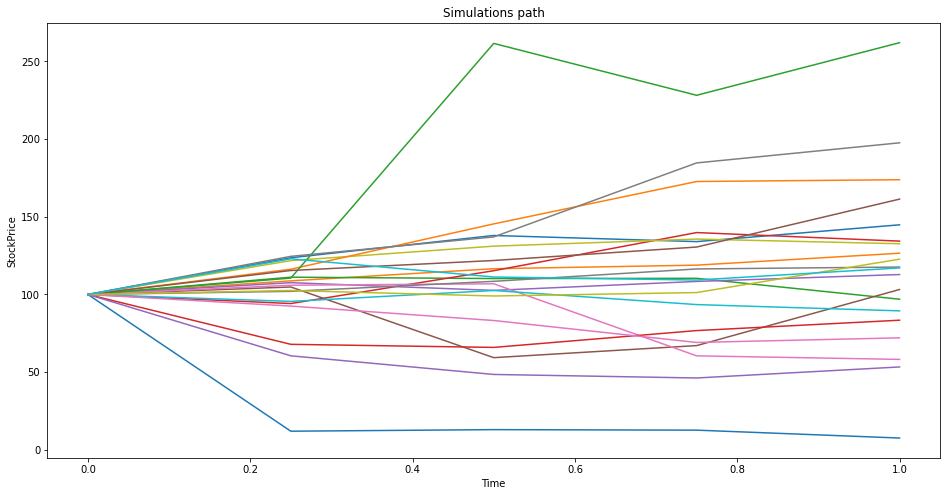

In [9]:
plt.figure(figsize=(16,8))
for i in range(0,20):
    plt.plot(time_list,stock_price_list[i])
plt.xlabel('Time')
plt.ylabel('StockPrice')
plt.title('Simulations path')
plt.show()

## Question 3

Now we use the Object Oriented Programming method to simulate the stock prices. The Question consists of 5 parts and hence we wrote an instance to read the input variables and 4 methods to simulate stock prices, create list of time steps, price vanilla Europian call option and vanilla Europian put option

In [16]:
class stock:
    
    def __init__(self,s_0,r,lamda,delta,mu,vol,maturity,dt,NoOfSimulations=21):
        self.s_0 = s_0
        self.r = r
        self.lamda = lamda
        self.delta = delta
        self.mu = mu
        self.vol = vol
        self.maturity = maturity
        self.dt = dt
        self.NoOfSimulations = NoOfSimulations
    
    def stock_price_simulation(self):
        timesteps = self.maturity/self.dt
        StockPrices = np.zeros((int(timesteps+1),self.NoOfSimulations))
        StockPrices[0] = self.s_0
        for i in range(1,int(timesteps+1)):
            z = np.random.standard_normal(self.NoOfSimulations)
            y = np.random.poisson(lam=self.lamda,size=self.NoOfSimulations)
            rj = self.lamda*(np.exp(self.mu+0.5*(self.delta**2))-1)
            StockPrices[i] = StockPrices[i-1]*(np.exp((self.r - rj - 0.5 * self.vol ** 2) * (self.dt)  + self.vol * math.sqrt(self.dt) * z) + (np.exp(self.mu+self.delta*(z**2))-1)*y)
        StockPrices = StockPrices.T
        return StockPrices
    
    def time_list(self):
        return np.arange(0,self.maturity+self.dt,self.dt)
    
    def price_eurcall(self,StrikePrice):
        prices = self.stock_price_simulation()
        prices = prices.T
        return np.sum(np.maximum(prices[-1]-StrikePrice,0))/self.NoOfSimulations
    
    def price_eurput(self,StrikePrice):
        prices = self.stock_price_simulation()
        prices = prices.T
        return np.sum(np.maximum(StrikePrice-prices[-1],0))/self.NoOfSimulations

### Readind the inputs,default variable and overriding them

As you can observe, our initial code has default value of 21 for No.of simulations which means if we do not give any value for no.of simulations in the input, the program interprets the value of 21 we can override the default variable by simply specifying the number of simulations. For example, in the execution, we are simulating 100 prices at each time step. So, effectively, we are overriding the default value of 21

In [17]:
currstock = stock(100,0.05,0.2,0.6,-0.6,0.2,1,0.25,100)
stockpricelist = currstock.stock_price_simulation()
timelist = currstock.time_list()
call_price = currstock.price_eurcall(120)
put_price = currstock.price_eurput(90)

### Call Price & Put price

Call price takes only one input and that is strike price which in the above case is given as 120 whereas put was given a strike price of 90

In [18]:
call_price

65.01413930181269

In [19]:
put_price

7.597771544653178

### Simulated Stock prices

After calling the method, we have obtained the simulated stock prices in the form a nested list with 100 columns and 5 rows

In [20]:
stockpricelist[0:10]

array([[100.        , 101.76953481, 104.823581  , 103.4300214 ,
        100.65359766],
       [100.        , 111.85832165, 125.95802552, 144.9343034 ,
        199.61460869],
       [100.        , 112.97742466, 102.76153091, 115.77253499,
        113.44840058],
       [100.        , 111.45325138, 113.34891109, 110.00098628,
        122.36422025],
       [100.        , 102.52940609, 103.73407552, 122.61484232,
        241.85422721],
       [100.        , 109.29288417, 100.60885643, 117.79690419,
        117.57542819],
       [100.        ,  90.24232624,  64.49563521,  64.62714915,
         46.80592872],
       [100.        , 117.79126781, 141.32674475, 142.61363322,
        192.23290477],
       [100.        , 102.1663421 ,  58.71211131,  65.00521738,
         57.77041122],
       [100.        ,  96.73062835,  91.51307568,  75.57643898,
         86.19090028]])

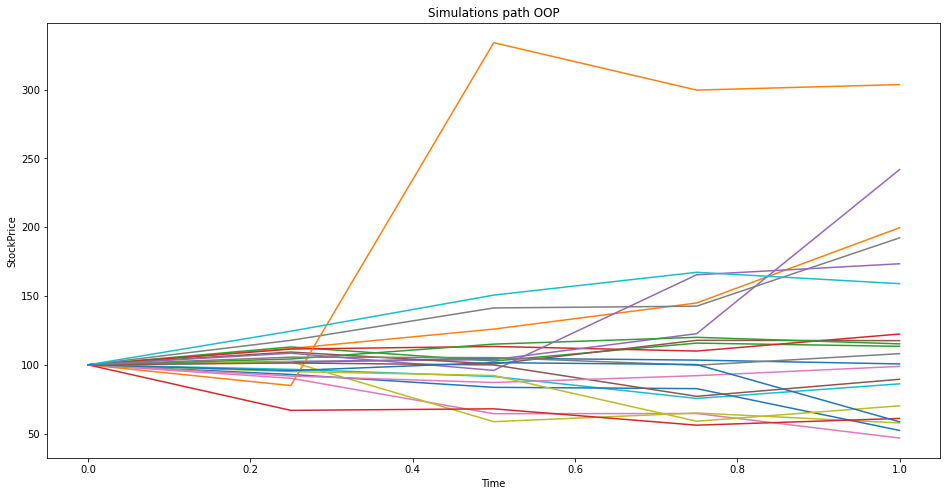

In [21]:
plt.figure(figsize=(16,8))
for i in range(0,21):
    plt.plot(timelist,stockpricelist[i])
plt.xlabel('Time')
plt.ylabel('StockPrice')
plt.title('Simulations path OOP')
plt.show()